$$
\textbf{Lógica Computacional: 2020/2021}\qquad
\textbf{Trabalho 1}\qquad
\scriptsize{Gilberto \, Cunha \quad Tomás \, Carneiro}
$$

# Problema 2

In [1]:
from z3 import *

In [8]:
n = 16

def gate_XOR (out, a, b, s):
    s.add(a^b == out)
    
def gate_shift (out, a, r, s):
    s.add(a >> r == out)
    
def gate_sum (out, a, b, s):
    s.add(a + b == out)

In [14]:
%config InlineBackend.figure_format = "svg"
import networkx as nx
import matplotlib.pyplot as plt

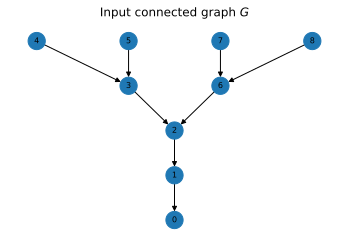

In [20]:
G = nx.DiGraph()
G.add_nodes_from([i for i in range(9)])
G.add_edges_from([(1, 0), (2, 1), (3, 2), (6, 2), (4, 3), (5, 3), (7, 6), (8, 6)])

G.nodes[0]["type"] = "output"
G.nodes[0]["value"] = BitVecVal(10, n)
for i in [4, 5, 7, 8]:
    G.nodes[i]["type"] = "input"
G.nodes[1]["type"] = "shift"
G.nodes[2]["type"] = "xor"
G.nodes[3]["type"] = "sum"
G.nodes[3]["value"] = BitVecVal(3, n)
G.nodes[6]["type"] = "xor"

plt.title("Input connected graph $G$")
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
nx.draw(G, font_size=8, pos=pos, with_labels=True)
plt.show()

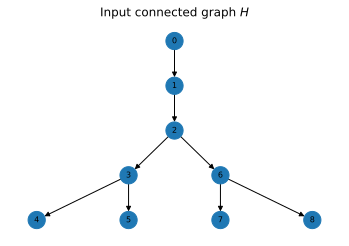

In [31]:
H = nx.DiGraph.reverse(G)

plt.title("Input connected graph $H$")
pos = nx.nx_pydot.graphviz_layout(H)
pos = nx.nx_pydot.graphviz_layout(H, prog="dot")
nx.draw(H, font_size=8, pos=pos, with_labels=True)
plt.show()

In [ ]:
def gate_XOR (out, a, b, s):
    s.add(a^b == out)
    
def gate_shift (out, a, r, s):
    s.add(a >> r == out)
    
def gate_sum (out, a, b, s):
    s.add(a + b == out)

In [49]:
import numpy as np

In [79]:
def draw_graph (graph):
    node_labels = {}
    for i in graph.nodes:
        if graph.nodes[i]["type"] == "xor":
            node_labels[i] = "$\oplus$"
        elif graph.nodes[i]["type"] == "sum":
            node_labels[i] = "$+$"
        elif graph.nodes[i]["type"] == "shift":
            node_labels[i] = "$\gg_{" + str(graph.nodes[i]["r"]) + "}$"
        elif graph.nodes[i]["type"] in "output":
            node_labels[i] = graph.nodes[i]["value"]
        else:
            node_labels[i] = "?"

    edge_labels = {}
    for i,j in graph.edges:
        if graph.nodes[j]["value"] == None:
            edge_labels[i,j] = "?"
        else:
            edge_labels[i,j] = graph.nodes[j]["value"]

    plt.title("Input connected graph $G$")
    pos = nx.nx_pydot.graphviz_layout(G)
    pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
    nx.draw(G, font_size=10, pos=pos, labels=node_labels, node_size=[600 for _ in graph.nodes])
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    plt.show()

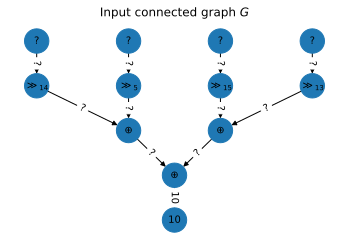

In [96]:
G = nx.DiGraph()
G.add_nodes_from([i for i in range(12)])
G.add_edges_from([(1, 0), (2, 1), (3, 1), (6, 3), (4, 2), (5, 2), (7, 3), (8, 7), (9, 5), (10, 4), (11, 6)])

G.nodes[0]["type"] = "output"
G.nodes[0]["value"] = BitVecVal(10, n)
for i in [8, 9, 10, 11]:
    G.nodes[i]["type"] = "input"
    G.nodes[i]["value"] = None
for i in [1, 2, 3]:
    G.nodes[i]["type"] = "xor"
    G.nodes[i]["value"] = None
for i in [4, 5, 6, 7]:
    G.nodes[i]["type"] = "shift"
    G.nodes[i]["value"] = None
    G.nodes[i]["r"] = np.random.randint(1, 16)
    
draw_graph(G)

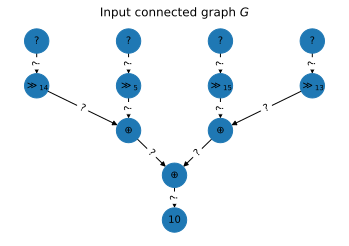

In [97]:
H = nx.DiGraph.reverse(G)
draw_graph(H)

In [110]:
print(H.nodes[0]["value"])

10


In [107]:
solver = Solver()

B = {}
for i, j in H.edges:
    if H.nodes[i]["type"] in ["sum", "output"]:
        B[i,j] = H.nodes[i]["value"]
    else:
        B[i,j] = BitVec(f"{i},{j}", n)

for i, j in H.edges:
    if H.nodes[j]["type"] == "xor":
        out = B[i,j]
        nbr1, nbr2 = list(H.neighbors(j))
        a, b = B[j, nbr1], B[j, nbr2]
        solver.add(a^b == out)
    elif H.nodes[j]["type"] == "shift":
        out = B[i,j]
        nbr = list(H.neighbors(j))[0]
        a = B[j, nbr]
        solver.add(a >> H.nodes[j]["r"] == out)

if solver.check() == sat:
    m = solver.model()
    
    for i,j in H.edges:
        print((i,j), m[B[i,j]])
    
    node_values = {i: m[B[i,j]] for (i,j) in H.edges}
    # print(node_values)
    for i in G.nodes:
        if i in node_values:
            G.nodes[i]["value"] = node_values[i]
    print (solver.model())

(0, 1) None
(1, 2) 10
(1, 3) 0
(2, 4) 65534
(2, 5) 65524
(3, 6) 0
(3, 7) 0
(4, 10) 32768
(5, 9) 65152
(6, 11) 0
(7, 8) 0
[4,10 = 32768,
 6,11 = 0,
 7,8 = 0,
 5,9 = 65152,
 1,3 = 0,
 3,7 = 0,
 3,6 = 0,
 1,2 = 10,
 2,5 = 65524,
 2,4 = 65534]


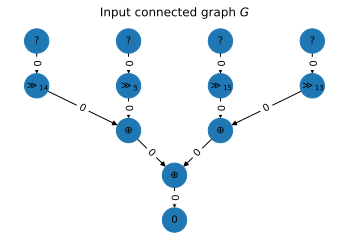

In [103]:
draw_graph(G)